In [115]:
import pandas as pd 
import numpy as np

In [116]:
db = pd.read_csv('spam.csv', encoding='latin1')


In [117]:
db = db[['v1' , 'v2']]

In [118]:
db.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [119]:
db.shape

(5572, 2)

In [120]:
db.rename(columns={'v1':'target' , 'v2':'text'} , inplace= True)

In [121]:
db.sample(5)

,target,text
5248,ham,U come n search tat vid..not finishd..
3698,ham,How i noe... Did Ì_ specify da domain as nusst...
4225,ham,"Ok thats cool. Its , just off either raglan rd..."
393,ham,Yes i think so. I am in office but my lap is i...
4645,spam,We tried to contact you re your reply to our o...


In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [123]:
db['target'] = le.fit_transform(db['target'])

In [124]:
db.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [125]:
db.isnull().sum()

target    0
text      0
dtype: int64

In [126]:
db.duplicated().sum()

403

In [127]:
db = db.drop_duplicates(keep='first')

In [128]:
db.shape

(5169, 2)

In [129]:
db['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

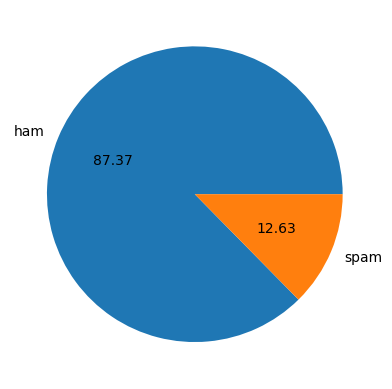

In [130]:
import matplotlib.pyplot as plt
plt.pie(db['target'].value_counts() , labels=['ham','spam'], autopct= '%0.2f')
plt.show()

In [131]:
import nltk

In [132]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Hardik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [133]:
db['char'] = db['text'].apply(len)

In [134]:
db.head()

,target,text,char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [135]:
from nltk.tokenize import word_tokenize

In [136]:
from nltk.tokenize import sent_tokenize


In [137]:
db['word'] = db['text'].apply(lambda x: len(word_tokenize(str(x))))

In [138]:
db.head()

,target,text,char,word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [139]:
db['sent'] = db['text'].apply(lambda x: len(sent_tokenize(str(x))))

In [140]:
db.head()

,target,text,char,word,sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [146]:
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hardik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [151]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [158]:
def transform(text): 
    text = text.lower()
    text = word_tokenize(text)
    y = []
    for i in text: 
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text: 
        y.append(ps.stem(i))
    return " ".join(y)
    

In [159]:
transform('Did you Like mY dancing Presentation! Hardik ?? ')

'like danc present hardik'

In [160]:
db['transformed_text'] = db['text'].apply(transform)

In [161]:
db.head()

,target,text,char,word,sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [163]:
!pip install wordcloud

In [164]:
from wordcloud import WordCloud
wc = WordCloud()

In [188]:
spam_wc = wc.generate(db[db['target'] == 1]['transformed_text'].str.cat(sep = " "))

In [189]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

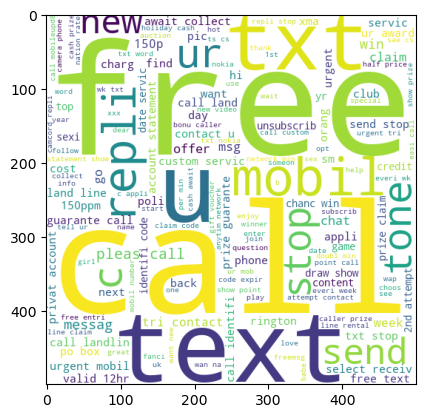

In [190]:
plt.imshow(spam_wc)

In [191]:
spam_wc = wc.generate(db[db['target'] == 1]['transformed_text'].str.cat(sep = " "))

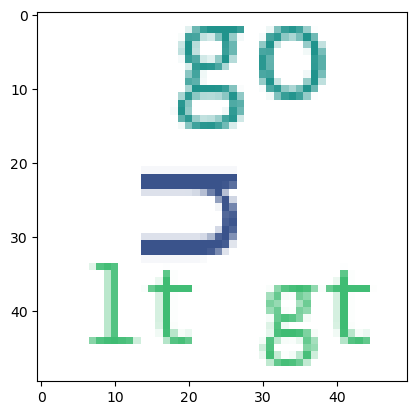

In [201]:
plt.imshow(ham_wc)

In [209]:
spam_corpus = []
for msg in db[db['target'] == 1]['transformed_text'].tolist(): 
    for word in  msg.split():
        spam_corpus.append(word)


In [210]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [218]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [219]:
ham_corpus = []
for msg in db[db['target'] == 0]['transformed_text'].tolist(): 
    for word in  msg.split():
        ham_corpus.append(word)


In [220]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [221]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [224]:
import sklearn

In [241]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [242]:
X = tfidf.fit_transform(db['transformed_text']).toarray()

In [243]:
y = db['target'].values

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=2)

In [246]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [247]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [248]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [249]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [250]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [257]:
new_text = ["Win a brand-new iPhone 15. Limited offer! Click here."]
new_text_vector = tfidf.transform(new_text)


In [258]:
prediction = mnb.predict(new_text_vector)
print("Spam" if prediction[0] == 1 else "Not Spam")


Spam
